<a href="https://colab.research.google.com/github/SEOYUNJE/Lung-Image-Analysis/blob/main/Discuss/LR_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Scheduler

### Cosine Decay

- initial_learning_rate = 최초 learning rate
- decay_steps = 적용할 steps 횟수
- alpha = 최소 learning rate
- (최소 learning rate = alpha * inital_learning_rate)

In [9]:
cos_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=10,
    alpha=1e-3
)


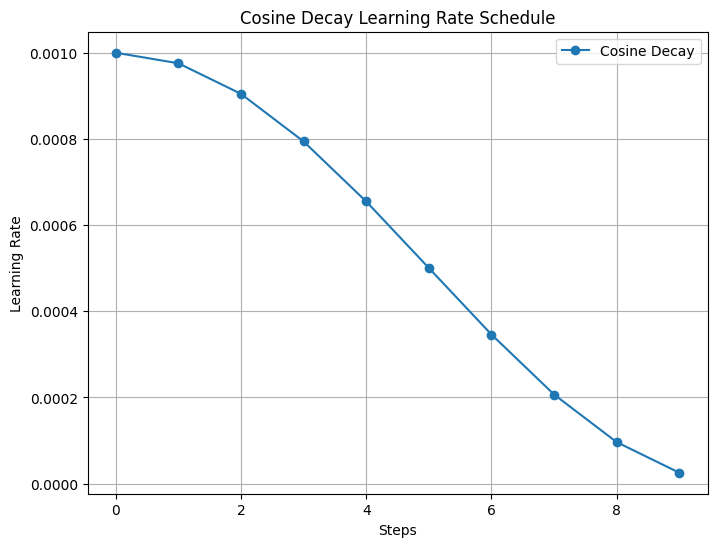

In [13]:
steps = np.arange(0, 10)
learning_rates = [cos_decay(step).numpy() for step in steps]

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(steps, learning_rates, label='Cosine Decay', marker='o')
plt.title('Cosine Decay Learning Rate Schedule')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

### Warm up Cosine Decay
- warmup_target = Wram up단계에서 도달하고자 하는 최종 학습률
- warmup_steps = Warm up단계가 지속되는 학습단계(step)수


In [67]:
warmup_cos_decay = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=20,
    alpha=1e-3,
    warmup_target=1e-2,
    warmup_steps=1
)

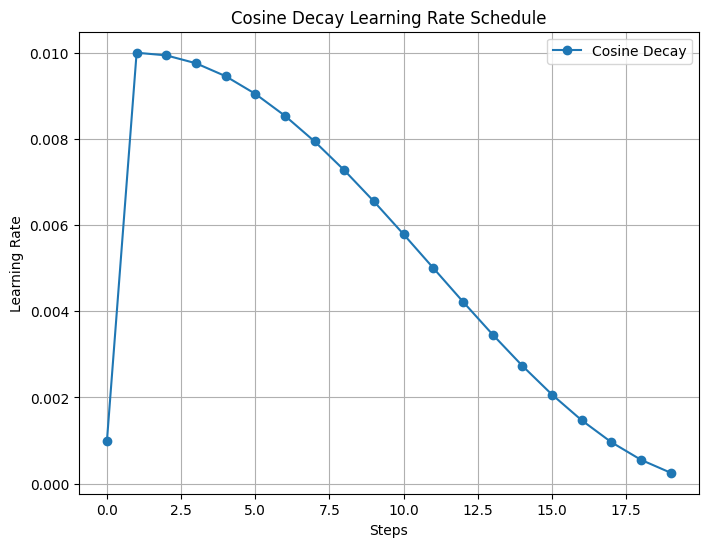

In [68]:
steps = np.arange(0, 20)
learning_rates = [warmup_cos_decay(step).numpy() for step in steps]

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(steps, learning_rates, label='Cosine Decay', marker='o')
plt.title('Cosine Decay Learning Rate Schedule')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

### Cosine Decay Annealing

- initial_learning_rate = 최초 learning_rate
- first_decay_steps = 최초 decay step 수
- t_mul = 전체 steps수에 얼마나 cosine annealing을 반복할지 결정하는 계수
- m_mul = warm restart시 적용될 초기 learning rate 비율
- alpha = 최소 learning rate

In [54]:
cosine_annealing_1 = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=5,
    t_mul=1,
    m_mul=1,
    alpha=1e-3
)

cosine_annealing_2 = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=5,
    t_mul=2,
    m_mul=1,
    alpha=1e-3
)


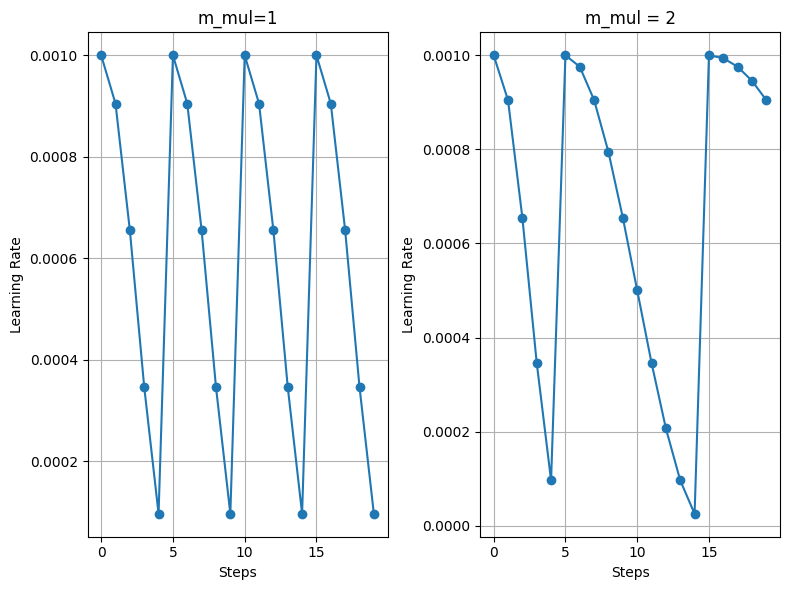

In [59]:
steps = np.arange(0, 20)
learning_rates_1 = [cosine_annealing_1(step).numpy() for step in steps]
learning_rates_2 = [cosine_annealing_2(step).numpy() for step in steps]


# 그래프 그리기
plt.figure(figsize=(8, 6))

plt.subplot(1,2,1)
plt.plot(steps, learning_rates_1, marker='o')
plt.title('t_mul=1')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(steps, learning_rates_2, marker='o')
plt.title('t_mul = 2')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [65]:
cosine_annealing_1 = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=5,
    t_mul=1,
    m_mul=1,
    alpha=1e-3
)

cosine_annealing_2 = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=5,
    t_mul=1,
    m_mul=0.9,
    alpha=1e-3
)


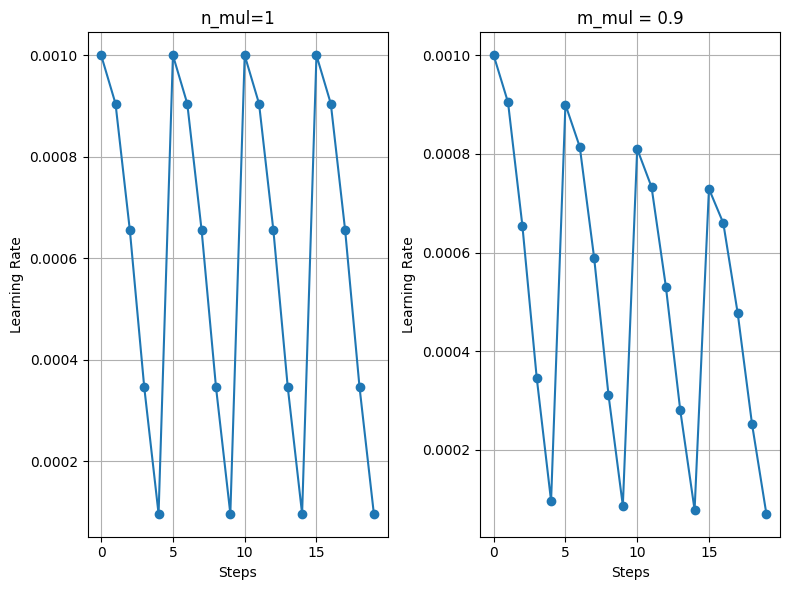

In [66]:
steps = np.arange(0, 20)
learning_rates_1 = [cosine_annealing_1(step).numpy() for step in steps]
learning_rates_2 = [cosine_annealing_2(step).numpy() for step in steps]


# 그래프 그리기
plt.figure(figsize=(8, 6))

plt.subplot(1,2,1)
plt.plot(steps, learning_rates_1, marker='o')
plt.title('n_mul=1')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(steps, learning_rates_2, marker='o')
plt.title('m_mul = 0.9')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

## Optimizer

- **AdamW**: This is an extension to the Adam algorithm that prevents exponential weights decay of the model's weights in the outer layers as well as encourages penalized hyper volume below the default weights.

- **Adafactor**: It was designed to have low memory usage and is scalable. This optimizer can offer significant optimizer performances using multiple GPUs (see below).

